In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

from helper import plot_contour

In [2]:
data = np.genfromtxt('data.csv', delimiter=";")
data.shape

data_x1 = np.array(data[:,0])
data_x2 = np.array(data[:,1])

X1 = st.norm(data_x1.mean(), data_x1.std())
X2 = st.norm(data_x2.mean(), data_x2.std())
print(data_x1.mean(), data_x1.std())
print(data_x2.mean(), data_x2.std())

def calculate_covariance(X1, X2):
    '''
    Covariance of two random variables X1 and X2 (numpy arrays).
    '''
    mean_x1 = X1.mean()
    mean_x2 = X2.mean()
    diff_x1 = X1 - mean_x1
    diff_x2 = X2 - mean_x2
    product = diff_x1 * diff_x2
    covariance = product.mean()
    return covariance

def pearson_correlation(X1, X2):
    covariance = calculate_covariance(X1, X2)
    correl_coeff = covariance/(X1.std()*X2.std())
    return correl_coeff

covariance = calculate_covariance(data_x1, data_x2)
print(f'The covariance of X1 and X2 is {covariance:.5f}')
correl_coeff = pearson_correlation(data_x1, data_x2)
print(f'The correlation coefficient of X1 and X2 is {correl_coeff:.5f}')

mean_vector = [data_x1.mean(), data_x2.mean()]
cov_matrix = [[data_x1.std()**2, covariance],
              [covariance, data_x2.std()**2]]
bivar_dist = st.multivariate_normal(mean_vector, cov_matrix)

10.124711 3.1256827640499605
15.042626 5.0734512576868225
The covariance of X1 and X2 is 9.47317
The correlation coefficient of X1 and X2 is 0.59737


In [3]:
N = len(data_x1)
print(f'Number of samples: {N}')
samples = bivar_dist.rvs(N)
sample_x1 = samples[:,0]
sample_x2 = samples[:,1]

Number of samples: 1000


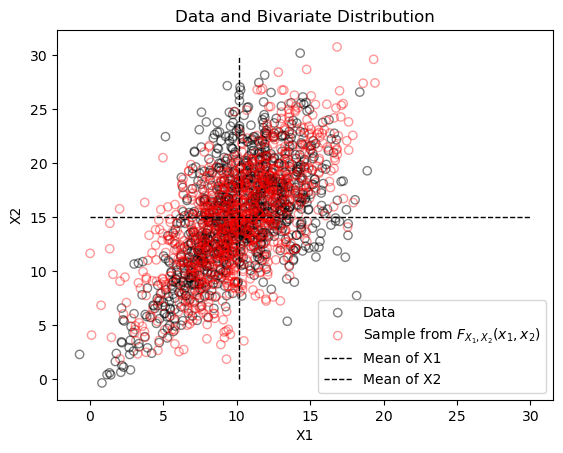

In [4]:
# plot data and N samples from bivar_dist using a new plot

fig, ax = plt.subplots()
ax.scatter(data_x1, data_x2, label='Data',
           edgecolor='black', linewidth=1, facecolors='none', alpha=0.5)
ax.scatter(sample_x1, sample_x2, label='Sample from $F_{X_1,X_2}(x_1,x_2)$',
           edgecolor='red', linewidth=1, facecolors='none', alpha=0.4)
ax.vlines(data_x1.mean(), 0, 30, label='Mean of X1',
         color='black', linestyle='--', linewidth=1)
ax.hlines(data_x2.mean(), 0, 30, label='Mean of X2',
         color='black', linestyle='--', linewidth=1)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Data and Bivariate Distribution')
plt.legend()
plt.show()



In [5]:
def get_rho_quadrants(x1, x2):
    mean_x1 = x1.mean()
    mean_x2 = x2.mean()

    upper_right = (x1 > mean_x1) & (x2 > mean_x2)
    upper_left = (x1 <= mean_x1) & (x2 > mean_x2)
    lower_left = (x1 <= mean_x1) & (x2 <= mean_x2)
    lower_right = (x1 > mean_x1) & (x2 <= mean_x2)

    rho_ur = pearson_correlation(x1[upper_right], x2[upper_right])
    rho_ul = pearson_correlation(x1[upper_left], x2[upper_left])
    rho_ll = pearson_correlation(x1[lower_left], x2[lower_left])
    rho_lr = pearson_correlation(x1[lower_right], x2[lower_right])

    print(f'rho in upper right: {rho_ur:8.5f}')
    print(f'rho in upper left:  {rho_ul:8.5f}')
    print(f'rho in lower left:  {rho_ll:8.5f}')
    print(f'rho in lower right: {rho_lr:8.5f}')

    return np.array([rho_ur, rho_ul, rho_ll, rho_lr])
    
print('Data:')
print('--------')
rho_quadrants_data = get_rho_quadrants(data_x1, data_x2)
print('\nSamples:')
print('--------')
rho_quadrants_samples = get_rho_quadrants(sample_x1, sample_x2)

Data:
--------
rho in upper right:  0.01921
rho in upper left:   0.07502
rho in lower left:   0.75642
rho in lower right: -0.02368

Samples:
--------
rho in upper right:  0.43550
rho in upper left:   0.14069
rho in lower left:   0.34875
rho in lower right:  0.13133


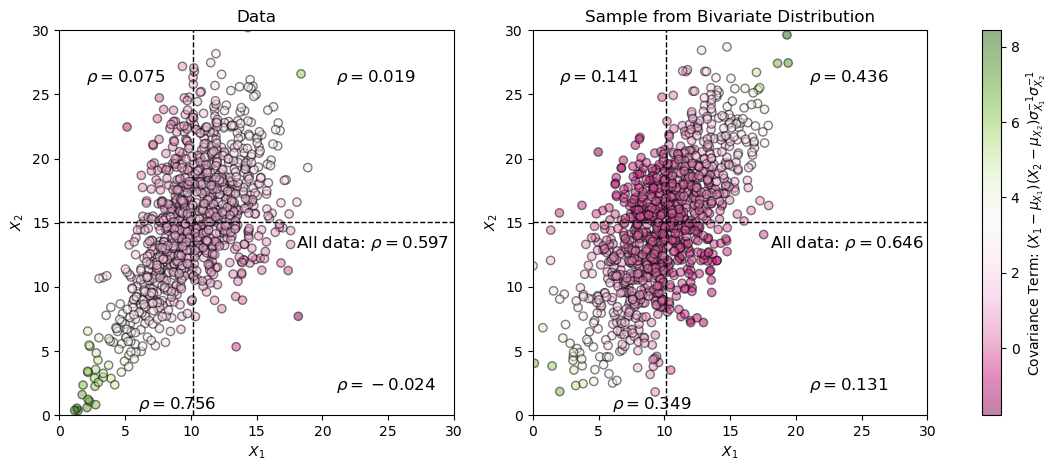

In [8]:
def get_cov_term(x1, x2):
    diff_1 = x1 - np.mean(x1)
    diff_2 = x2 - np.mean(x2)
    return diff_1*diff_2/np.std(x1)/np.std(x2)



cov_term_data = get_cov_term(data_x1, data_x2)

fig, ax = plt.subplots(1,2, figsize=(14,5))
sc = ax[0].scatter(data_x1, data_x2, c=cov_term_data,
                cmap='PiYG', edgecolor='black',
                linewidth=1, alpha=0.5)
ax[0].vlines(data_x1.mean(), 0, 30, label='Mean of X1',
         color='black', linestyle='--', linewidth=1)
ax[0].hlines(data_x2.mean(), 0, 30, label='Mean of X2',
         color='black', linestyle='--', linewidth=1)
ax[0].set_xlabel('$X_1$')
ax[0].set_ylabel('$X_2$')
ax[0].set_title('Data')
ax[0].set_xlim([0, 30])
ax[0].set_ylim([0, 30])

cov_term_data = get_cov_term(sample_x1, sample_x2)

sc = ax[1].scatter(sample_x1, sample_x2, c=cov_term_data,
                cmap='PiYG', edgecolor='black',
                linewidth=1, alpha=0.5)
ax[1].vlines(data_x1.mean(), 0, 30, label='Mean of X1',
         color='black', linestyle='--', linewidth=1)
ax[1].hlines(data_x2.mean(), 0, 30, label='Mean of X2',
         color='black', linestyle='--', linewidth=1)
ax[1].set_xlabel('$X_1$')
ax[1].set_ylabel('$X_2$')
ax[1].set_title('Sample from Bivariate Distribution')
ax[1].set_xlim([0, 30])
ax[1].set_ylim([0, 30])
cbar = plt.colorbar(sc, ax=ax,
                    label=(r'Covariance Term: '
                           +r'$(X_1-\mu_{X_1})(X_2-\mu_{X_2})$'
                           +r'$\sigma_{X_1}^{-1}\sigma_{X_2}^{-1}$'))

rho_print_x = [21, 2, 6, 21, 18]
rho_print_y = [26, 26, 0.5, 2, 13]
rho_all = np.vstack((np.append(rho_quadrants_data,
                               pearson_correlation(data_x1, data_x2)),
                     np.append(rho_quadrants_samples,
                               pearson_correlation(sample_x1, sample_x2))))
for i in range(2):
    ax[i].text(rho_print_x[4], rho_print_y[4],
                f'All data: $\\rho={rho_all[i, 4]:.3f}$',
                fontsize=12, color='black')
    for j in range(4):
        ax[i].text(rho_print_x[j], rho_print_y[j],
                f'$\\rho={rho_all[i, j]:.3f}$',
                fontsize=12, color='black')

plt.savefig('dependence_illustrated.svg')
plt.show()